# COMP41680/COMP4760 Class Test

This test involves analysing store product sales data from different retail stores. **Complete all three tasks. All tasks carry equal marks.**

The data is stored in CSV format, with the following fields:

- *date*: the date on which product was sold
- *category*: high-level category type of the product
- *location*: store location where the product was sold
- *amount*: the sale value in euros of the product

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Task 1: Data Loading and Initial Characterisation

**(a)** URL for data.

http://mlg.ucd.ie/modules/python/test/retail.csv   
or simple load the file `retail.csv`

In [5]:
df = pd.read_csv("retail.csv",index_col="sale_id")
df.head()

,date,category,location,amount
sale_id,,,,
1001,2023-01-01,Games,Galway,104.14
1002,2023-01-01,Clothing,Dublin,49.42
1003,2023-01-01,Books,Cork,19.54
1004,2023-01-01,Games,Galway,60.08
1005,2023-01-02,Electronics,Dublin,99.77


**(b)** 

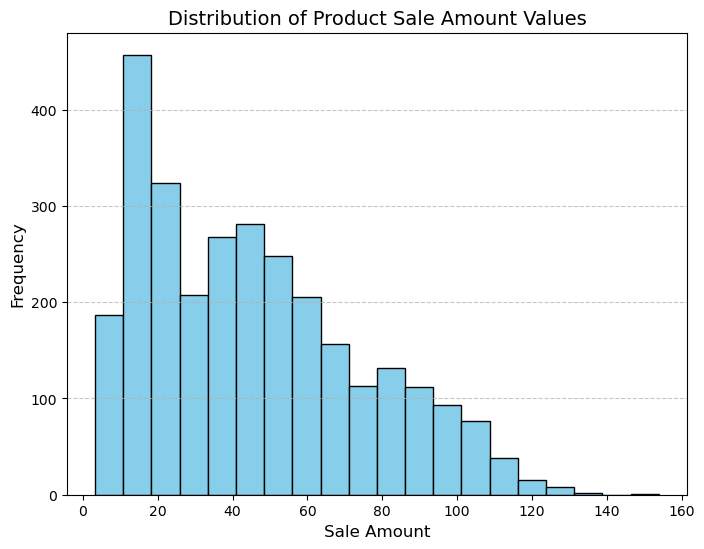

In [7]:
# 绘制直方图，展示 `amount` 销售金额的分布
plt.figure(figsize=(8, 6))
plt.hist(df["amount"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Product Sale Amount Values", fontsize=14)
plt.xlabel("Sale Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

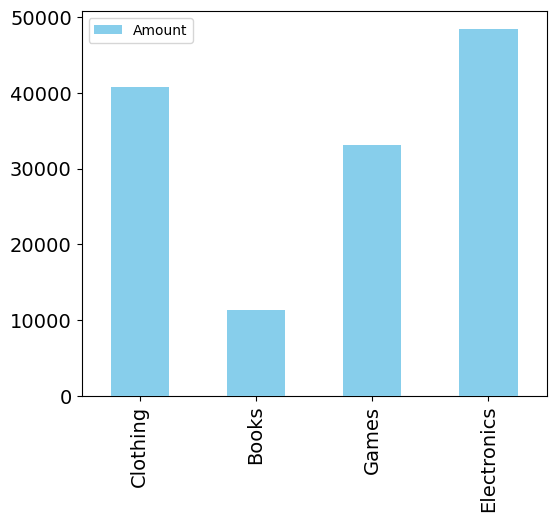

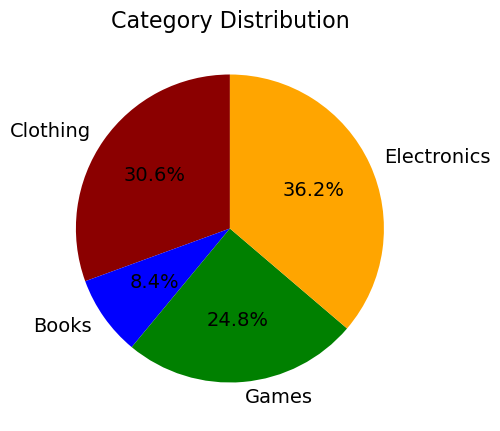

In [8]:
df_category = pd.DataFrame(
    {
        "Amount": [
            df.loc[df["category"] == "Clothing", "amount"].sum(),
            df.loc[df["category"] == "Books", "amount"].sum(),
            df.loc[df["category"] == "Games", "amount"].sum(),
            df.loc[df["category"] == "Electronics", "amount"].sum(),
        ]
    },
    index=["Clothing", "Books", "Games", "Electronics"]  # 指定索引
)
df_category.plot(kind="bar", fontsize=14, figsize=(6,5), color="skyblue", zorder=3)

ax = df_category.plot(
    kind="pie",
    y="Amount",  # 指定用于绘图的列
    labels=df_category.index,  # 使用索引作为标签
    fontsize=14,
    figsize=(6, 5),
    colors=["darkred", "blue", "green", "orange"],  # 设置颜色
    autopct='%1.1f%%',  # 显示百分比
    startangle=90,  # 起始角度
    legend=False  # 不显示图例
)
ax.set_ylabel("")
plt.title("Category Distribution", fontsize=16)
plt.show()

**(c)** 

In [10]:
category_sales = df["category"].value_counts()
print(category_sales)
location_sales = df["location"].value_counts()
print(location_sales)

category
Clothing       1007
Books           733
Games           647
Electronics     538
Name: count, dtype: int64
location
Dublin       846
Galway       721
Cork         642
Limerick     447
Waterford    269
Name: count, dtype: int64


## Task 2: Analysis of Feature Associations

**(a)** 

<Axes: xlabel='category'>

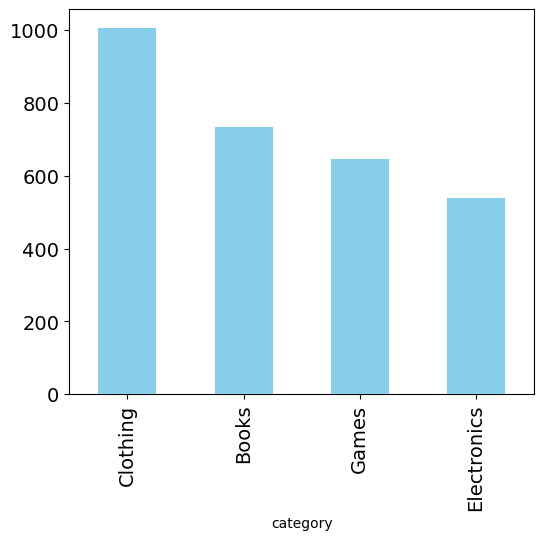

In [13]:
category_sales.plot(kind="bar", fontsize=14, figsize=(6,5), color="skyblue", zorder=3)

**(b)**  


             Amount
Dublin     37819.13
Galway     34365.88
Cork       28491.52
Limerick   20857.16
Waterford  12086.87


<Axes: >

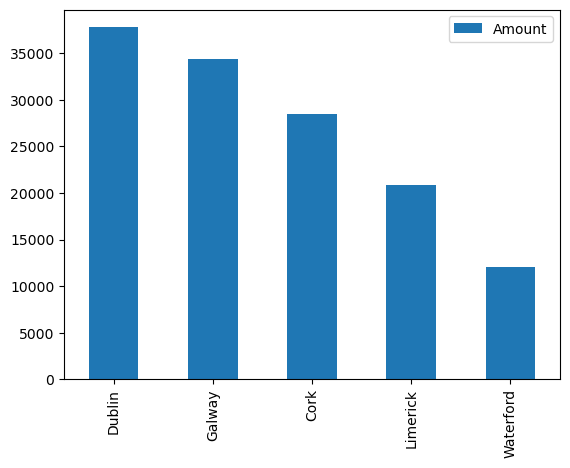

In [15]:
pd_location = pd.DataFrame(
    {
        "Amount": [
            df.loc[df["location"] == "Dublin", "amount"].sum(),
            df.loc[df["location"] == "Galway", "amount"].sum(),
            df.loc[df["location"] == "Cork", "amount"].sum(),
            df.loc[df["location"] == "Limerick", "amount"].sum(),
            df.loc[df["location"] == "Waterford", "amount"].sum(),
        ]
    },
    index=["Dublin","Galway","Cork","Limerick","Waterford"]
)
print(pd_location)
pd_location.plot(kind="bar")

**(c)**  

category   Books  Clothing  Electronics  Games
location                                      
Cork         183       233          127     99
Dublin       243       305          166    132
Galway       139       183          109    290
Limerick     105       174           93     75
Waterford     63       112           43     51


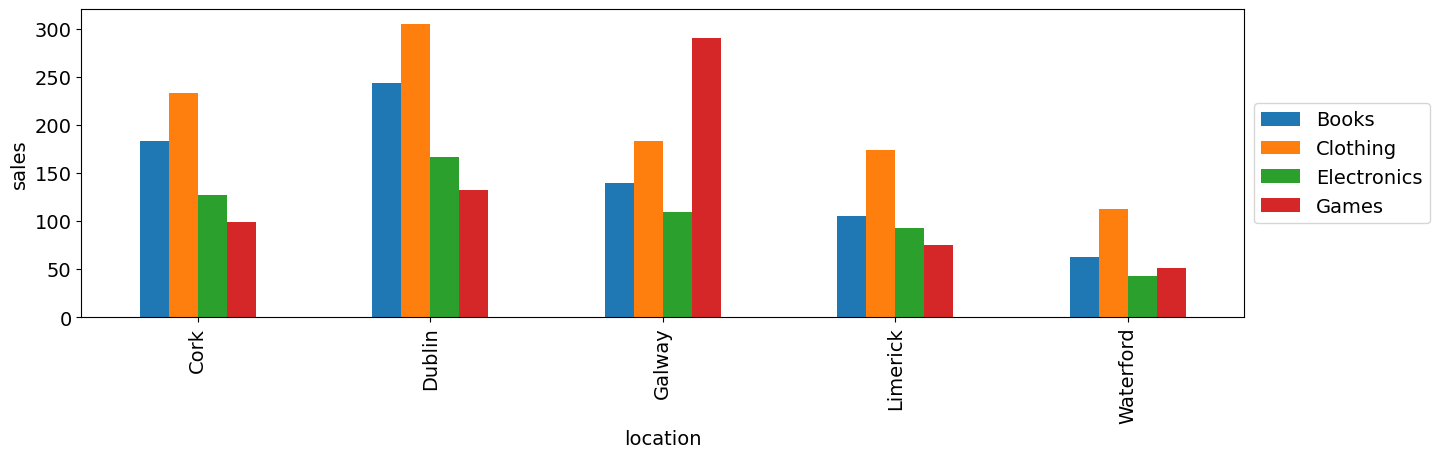

In [17]:
location_category_sales = df.groupby(['location', 'category']).size().unstack(fill_value=0)
print(location_category_sales)
ax = location_category_sales.plot.bar(figsize=(15, 4), fontsize=14)
# customize the axes and title
ax.set_xlabel("location", fontsize=14)
ax.set_ylabel("sales", fontsize=14)
# move the legend to outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

## Task 3: Time Series Analysis

**(a)** 

              date     category location  amount    month
sale_id                                                  
1001    2023-01-01        Games   Galway  104.14  2023-01
1002    2023-01-01     Clothing   Dublin   49.42  2023-01
1003    2023-01-01        Books     Cork   19.54  2023-01
1004    2023-01-01        Games   Galway   60.08  2023-01
1005    2023-01-02  Electronics   Dublin   99.77  2023-01
...            ...          ...      ...     ...      ...
3921    2023-12-30  Electronics   Dublin   91.46  2023-12
3922    2023-12-30        Games   Dublin   67.78  2023-12
3923    2023-12-31     Clothing   Dublin   30.29  2023-12
3924    2023-12-31        Games   Galway   57.98  2023-12
3925    2023-12-31        Games   Galway   25.03  2023-12

[2925 rows x 5 columns]


<Axes: xlabel='month'>

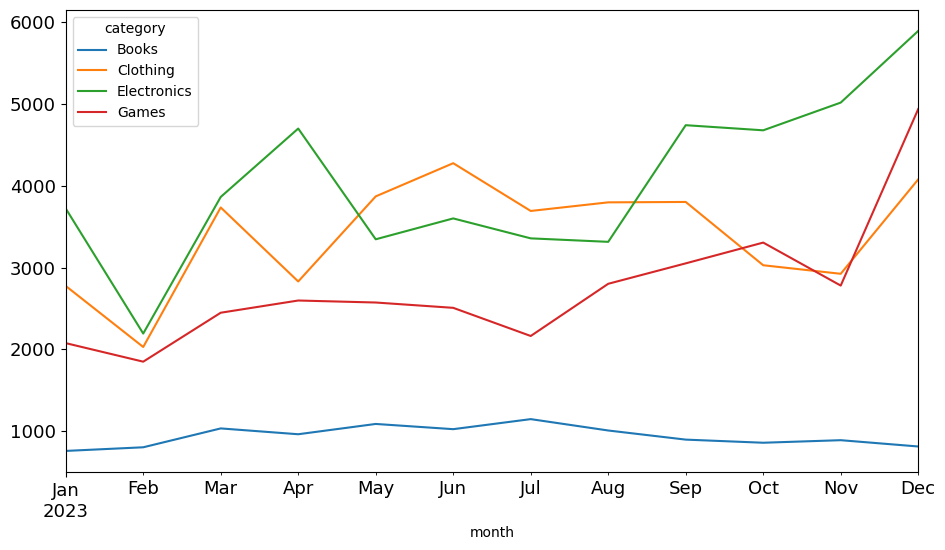

In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.to_period('M')
print(df)
sales_monthly = df.groupby(['month', 'category'])['amount'].sum().unstack(fill_value=0)
#print(sales_monthly)
sales_monthly.plot(figsize=(11, 6), fontsize=13)

**(b)**  

<Axes: xlabel='month'>

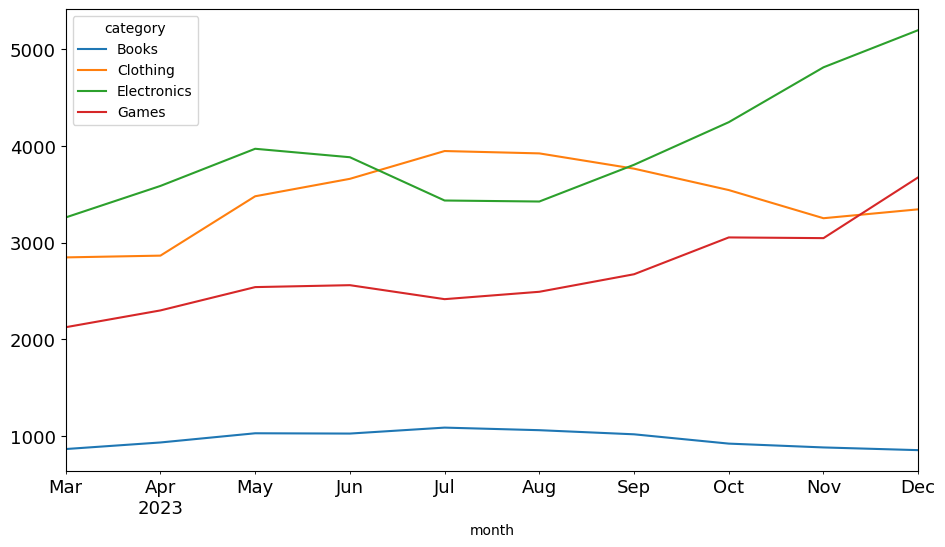

In [22]:
rm3 = sales_monthly.rolling(3).mean()
rm3 = rm3.loc["2023-03":]
rm3.plot(figsize=(11, 6), fontsize=13)